# GradCam

## Libraries

In [18]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import colorbar

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

from matplotlib import pyplot
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow.keras.backend as K

from numpy import expand_dims
#import cv2

## Get trained model

In [19]:
# load the model
model = load_model('save_models/keras_valid0.78050Train0.79153.h5')
# summarize the model
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 300, 128)          768       
_________________________________________________________________
activation_120 (Activation)  (None, 300, 128)          0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 300, 128)          0         
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 300, 16)           10256     
_________________________________________________________________
activation_121 (Activation)  (None, 300, 16)           0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 300, 16)           0         
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 300, 8)          

## Get waves to predict - Just 1 example

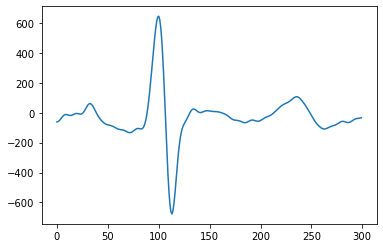

(300, 1)

In [33]:
beat_example = np.asarray([[ -61.30320269],[ -59.5238032 ],[ -54.87003519],[ -47.72724099],[ -39.01879708],[ -29.99951975],[ -21.9690816 ],[ -15.97561347],[ -12.58275942],[ -11.75790362],[ -12.90880025],[ -15.05799066],[ -17.10892797],[ -18.13395239],[ -17.60852747],[ -15.53026098],[ -12.39163815],[  -9.01424484],[  -6.28936958],[  -4.8952934 ],[  -5.06854315],[  -6.49284575],[  -8.33902328],[  -9.44953688],[  -8.62329169],[  -4.92965364],[   2.02756447],[  11.96314004],[  23.9181298 ],[  36.42123579],[  47.76513802],[  56.33197626],[  60.89234223],[  60.81156551],[  56.12255088],[  47.45865288],[  35.87384244],[  22.60202128],[   8.81700555],[  -4.55208103],[ -16.91546102],[ -28.0200406 ],[ -37.86836588],[ -46.59642974],[ -54.35353663],[ -61.22050792],[ -67.18577756],[ -72.17808153],[ -76.13597045],[ -79.08357715],[ -81.18173321],[ -82.73308199],[ -84.13586251],[ -85.798346  ],[ -88.03916572],[ -91.0040682 ],[ -94.62548941],[ -98.63919285],[-102.65569254],[-106.26816052],[-109.16758369],[-111.23312928],[-112.57176684],[-113.49445924],[-114.43312591],[-115.81857868],[-117.95058065],[-120.89427219],[-124.43165607],[-128.08400751],[-131.20401224],[-133.11920703],[-133.29494082],[-131.47867753],[-127.78965974],[-122.72836037],[-117.09664339],[-111.83871179],[-107.8306408 ],[-105.65872792],[-105.43123952],[-106.66314033],[-108.25986802],[-108.60689473],[-105.75078688],[ -97.63947678],[ -82.37869951],[ -58.46076437],[ -24.93132589],[  18.52259997],[  71.55904275],[ 133.21862791],[ 201.97887114],[ 275.7912573 ],[ 352.08004841],[ 427.70435422],[ 498.91124459],[ 561.32969974],[ 610.06514163],[ 639.94667728],[ 645.95269196],[ 623.79890858],[ 570.62500445],[ 485.67296455],[ 370.82447776],[ 230.86509817],[  73.37341154],[ -91.80901958],[-253.49649476],[-400.3593631 ],[-522.23543364],[-611.34862579],[-663.23494348],[-677.21897048],[-656.35891376],[-606.87033865],[-537.12974426],[-456.43076652],[-373.70390255],[-296.40827051],[-229.76252306],[-176.41134871],[-136.53924981],[-108.36210891],[ -88.86518959],[ -74.62467134],[ -62.55240993],[ -50.4369818 ],[ -37.20875021],[ -22.91961041],[  -8.48569592],[   4.71750061],[  15.30006166],[  22.24123042],[  25.13661507],[  24.27277765],[  20.53463395],[  15.186583  ],[   9.59071644],[   4.93163709],[   2.00781009],[   1.12780499],[   2.12222278],[   4.45516503],[   7.39869461],[  10.22365944],[  12.36186557],[  13.50630372],[  13.63441109],[  12.95931136],[  11.83079114],[  10.61761465],[   9.60382017],[   8.92428434],[   8.55160494],[   8.33105477],[   8.0472586 ],[   7.49874864],[   6.55643336],[   5.18899789],[   3.44995032],[   1.43388363],[  -0.78042652],[  -3.17828471],[  -5.82981422],[  -8.87353038],[ -12.46573455],[ -16.71090965],[ -21.59608816],[ -26.95285632],[ -32.46372471],[ -37.71674549],[ -42.29722682],[ -45.89267495],[ -48.38081268],[ -49.87297286],[ -50.69617516],[ -51.31394155],[ -52.20376742],[ -53.72290729],[ -55.99949437],[ -58.88101387],[ -61.95775602],[ -64.65880129],[ -66.3978507 ],[ -66.73150315],[ -65.48775889],[ -62.82920309],[ -59.23193928],[ -55.38345576],[ -52.02423012],[ -49.77302664],[ -48.98036676],[ -49.64726828],[ -51.42916436],[ -53.72262295],[ -55.81122115],[ -57.03239719],[ -56.9230741 ],[ -55.30905728],[ -52.31933078],[ -48.32666415],[ -43.83472671],[ -39.34423427],[ -35.23349076],[ -31.68192347],[ -28.65135837],[ -25.92320868],[ -23.17530216],[ -20.07357782],[ -16.35318394],[ -11.87001729],[  -6.61477699],[  -0.69338829],[   5.71348396],[  12.39558787],[  19.14892273],[  25.79491266],[  32.18373309],[  38.18920576],[  43.70535807],[  48.6526472 ],[  52.99597289],[  56.76931813],[  60.09606688],[  63.19229045],[  66.34356848],[  69.85354393],[  73.97211208],[  78.81964727],[  84.32796094],[  90.2169167 ],[  96.01776207],[ 101.14225256],[ 104.98396639],[ 107.02857168],[ 106.94629655],[ 104.64373155],[ 100.26252566],[  94.12658949],[  86.6531563 ],[  78.25240007],[  69.24266021],[  59.80289069],[  49.97251059],[  39.69471607],[  28.88678011],[  17.51367354],[   5.64147329],[  -6.54560934],[ -18.76862862],[ -30.70866851],[ -42.07399475],[ -52.65696884],[ -62.36184517],[ -71.1945048 ],[ -79.21810386],[ -86.49037298],[ -93.00501034],[ -98.6590148 ],[-103.25986532],[-106.57353768],[-108.40046352],[-108.65612613],[-107.42956494],[-104.99804589],[-101.78840517],[ -98.29163048],[ -94.95226551],[ -92.06353507],[ -89.69950008],[ -87.70653478],[ -85.76013971],[ -83.4741758 ],[ -80.53345937],[ -76.81224254],[ -72.44318137],[ -67.81384584],[ -63.48743323],[ -60.06575289],[ -58.0296875 ],[ -57.60019642],[ -58.65898148],[ -60.75299334],[ -63.18489247],[ -65.16840213],[ -66.00959827],[ -65.2675761 ],[ -62.85288869],[ -59.03834453],[ -54.37989654],[ -49.56915002],[ -45.25697835],[ -41.89500518],[ -39.63630761],[ -38.32022767],[ -37.54315512],[ -36.79397581],[ -35.61572863],[ -33.74852724]])
original_beat = beat_example 

plt.plot(beat_example)
plt.show()
beat_example.shape

## Make prediction -  Just 1 example

In [21]:
beat_example = beat_example.reshape(1, 300, 1)
predict = model.predict(beat_example) # use predict or predict_classes
predict_class =model.predict_classes(beat_example)
print("Predict Class =", predict_class, "corresponding to:", predict, ". Obese is [0., 1.]")

real_class = 0
#original code
#print("The real value is",real_class ,"corresponding to:", y_ann_data_testing[example_index])


Predict Class = [1] corresponding to: [[0.17249945 0.8275005 ]] . Obese is [0., 1.]


## Get gradients for the target class on the last layer

In [22]:
last_conv = model.get_layer('conv1d_99') #last_conv= model.layers[8]
grad_model = tf.keras.models.Model([model.inputs], [last_conv.output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(beat_example) #get activations maps + predictions from last conv layer
    loss = predictions[:, real_class] # the variable loss gets the probability of belonging to the defined class (the predicted class on the model output)

loss

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.17249945], dtype=float32)>

In [23]:
output = conv_outputs[0] #activations maps from last conv layer
grads = tape.gradient(loss, conv_outputs)[0] #function to obtain gradients from last conv layer

print("Output from last conv layer (activations maps) shape()", conv_outputs.shape)
print("grads shape:", grads.shape)

Output from last conv layer (activations maps) shape() (1, 300, 128)
grads shape: (300, 128)


###  Check activation maps on last conv layer 

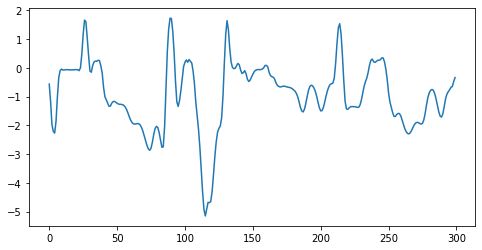

In [24]:
import matplotlib.ticker as ticker

activation_map = output[:,0]

fig, ax1 = plt.subplots(figsize=(8, 4))
#pd.DataFrame(activation_map)[0].plot(kind='bar') #, color='y')
pd.DataFrame(activation_map)[0].plot(kind='line')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show() 


### Check gradient matrix on last conv layer

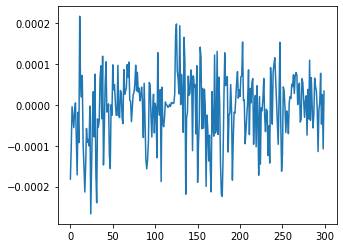

In [25]:
gradient = grads[:,0]

fig, ax1 = plt.subplots(figsize=(5, 4))
#pd.DataFrame(gradient)[0].plot(kind='bar', color='y')
pd.DataFrame(gradient)[0].plot(kind='line')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show() 


## Compute the guided gradients

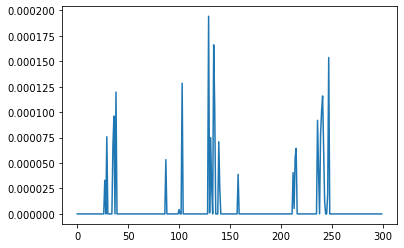

In [26]:
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

guide_grads_example = guided_grads[:,0]
plt.plot(guide_grads_example) 
plt.show() 


weights shape (128,)
min 0.0
max 2.3317814e-05


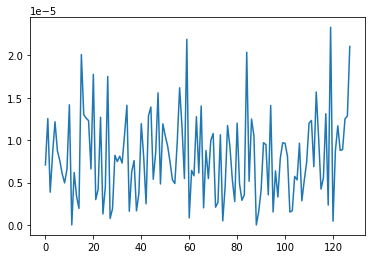

In [27]:
# Average guide gradients
weights = tf.reduce_mean(guided_grads, axis=(0))

print("weights shape", weights.shape) 
print("min", np.min(weights))
print("max", np.max(weights))

plt.plot(weights) 
plt.show() 

## Build a ponderated map of filters according to gradients importance

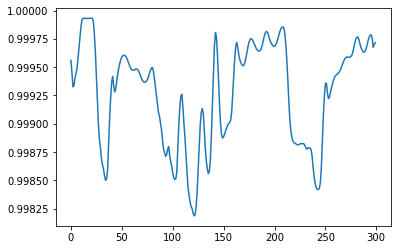

min 0.99818474
max 0.9999316


In [28]:
cam = np.ones(output.shape[0], dtype = np.float32)
for i, w in enumerate(weights):
    cam += w * output[:, i]
    
plt.plot(cam) 
plt.show() 

print("min", np.min(cam))
print("max", np.max(cam))


## Normalize cam values

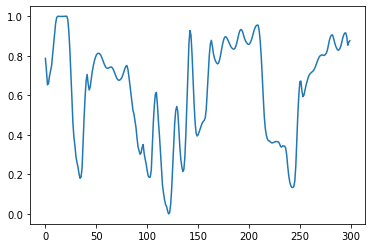

In [29]:
cam_norm = np.maximum(cam, 0)
heatmap = (cam_norm - cam_norm.min()) / (cam_norm.max() - cam_norm.min())

plt.plot(heatmap) 

## Verify cam values against beat 

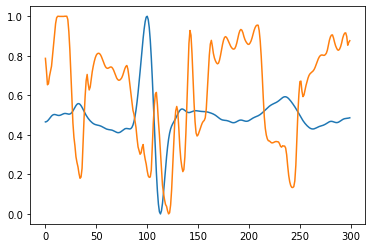

In [34]:
beat = (original_beat - original_beat.min()) / (original_beat.max() - original_beat.min())

plt.plot(beat)
plt.plot(heatmap) 

plt.show()